<center><h1>Mapping the emotional face. How individual face parts contribute to successful emotion recognition.</h1></center>

# 2. Global Counting  

Here, we look at global metrics of each face. The main metrics are %correct and %tiles revealed.

### Basic Imports

In [1]:
from myBasics import *
%matplotlib inline

In [2]:
logList = getFile('../rawTables/','pand*.csv')

Loading data of one participant for illustration purposes:

In [3]:
testDf = pd.read_csv(logList[-1],
            header=0,
            index_col=[0,1,2]
           )

In [4]:
testDf.head()

time     cumtime  e  i button  \
ident express id                                                 
0     0       9   2016-03-10 15:08:11   198.14952  0  0    hap   
              27  2016-03-10 15:15:00   607.15364  0  0    hap   
              37  2016-03-10 15:18:36   823.46331  0  0    hap   
              43  2016-03-10 15:20:31   937.80766  0  0    hap   
              58  2016-03-10 15:23:36  1123.17332  0  0    hap   

                           filename evaluation  stopRT  choiceRT  maskNum  \
ident express id                                                            
0     0       9   img/f_hap_cut.png        HIT   12275     16115       13   
              27  img/f_hap_cut.png        HIT   19242     20994       20   
              37  img/f_hap_cut.png        HIT   16303     17847       17   
              43  img/f_hap_cut.png        HIT    5062      7262        6   
              58  img/f_hap_cut.png        HIT    5377      6801        6   

                                                           maskList   #  
ident express id                                                         
0     0       9                3-28-29-7-24-44-45-22-10-43-30-18-34   9  
              27  40-15-0-37-1-27-45-46-44-23-18-43-22-3-41-29-1...  27  
              37   9-44-23-35-39-14-1-40-46-19-28-20-26-37-17-21-30  37  
              43                                   36-29-47-3-43-20  43  
              58                                  19-20-16-39-13-44  58

### get number of revealed tiles

In [5]:
def getMaskNums(df):
    # pre-formatted dict to write to
    d = {0:{'hap':{}, 'sad':{}, 'ang':{}, 'fea':{}, 'dis':{}, 'sup':{}, 'ntr':{} },
         1:{'hap':{}, 'sad':{}, 'ang':{}, 'fea':{}, 'dis':{}, 'sup':{}, 'ntr':{} }
        }

    # loop trough all rows
    for i,ident in enumerate(df.index.labels[0]):
        # get the current emotion and trial number
        express = df.index.labels[1][i]
        trial =  df.index.labels[2][i]
        # get the string emotion name corresponding to the number
        actual = myLabels[express]
        # get the decision
        decision = df.ix[ident].ix[express].ix[trial]["button"]
        # get the number of revealed tiles
        maskNum = df.ix[ident].ix[express].ix[trial]["maskNum"]
    
        # put number of revealed tiles into dict, according to what face it
        # belongs to and what answer was given
        try:
            d[ident][actual][decision].append(maskNum)
        except:
            d[ident][actual][decision] = [maskNum]

    return d

Example:  

Get all the number of revealed tiles for each trial for the male (1) fearful (fea) face. Here we see that we not only get the number of revealed tiles for each trial, but also information about what answer was given in that trial. In the present example, most of the 16 trials of the male fearful face were (correctly) labelled as fearful and in three cases, fear was misclassified as surprised (a plausible mistake)

In [6]:
getMaskNums(testDf)[1]['fea']

{'dis': [8.0],
 'fea': [19.0, 21.0, 18.0, 5.0, 9.0, 20.0, 9.0, 7.0, 6.0, 8.0],
 'sad': [4.0, 6.0, 4.0],
 'sup': [18.0, 12.0]}

### average across conditions

In [7]:
def getAvgMaskNums(d,pName):
    # i
    newD = {0:{'hap':{}, 'sad':{}, 'ang':{}, 'fea':{}, 'dis':{}, 'sup':{}, 'ntr':{} },
            1:{'hap':{}, 'sad':{}, 'ang':{}, 'fea':{}, 'dis':{}, 'sup':{}, 'ntr':{} }
        }

    for ident in newD:
        # what emotion does the face have
        for actual in newD[ident]:
            # here, we can loop through the same keys for the type of answer
            for decision in newD[ident]:
                # since some keys may not be there, we have to try:
                try:
                    newD[ident][actual][decision] = np.array(d[ident][actual][decision]).mean()
                except:
                    newD[ident][actual][decision] = np.nan
    
    # seperately for the female and male face
    fDf = pd.DataFrame(newD[0])
    fDf.index = [[pName]*7,['f']*7, fDf.index]
    mDf = pd.DataFrame(newD[1])
    mDf.index = [[pName]*7,['m']*7,mDf.index]

    rawDf = pd.concat([ fDf,mDf])
    return rawDf

Example: 

Show the average number of revealed tiles for one participant, across all trial for the fearful face

In [8]:
getAvgMaskNums(getMaskNums(testDf),'test')['fea']

test  f  ang    16.800000
         dis          NaN
         fea    15.000000
         hap          NaN
         ntr          NaN
         sad     5.500000
         sup    11.250000
      m  ang          NaN
         dis     8.000000
         fea    12.200000
         hap          NaN
         ntr          NaN
         sad     4.666667
         sup    15.000000
Name: fea, dtype: float64

Do this for all participants:

In [9]:
def makeBigMask(logList):
    
    bigDf = pd.DataFrame()

    for logFile in logList:
        pName = "p"+logFile[logFile.rfind('e')+1:logFile.rfind('.')]

        df = pd.read_csv(logFile,
                header=0,
                index_col=[0,1,2]
               )

        countDf = getMaskNums(df)

        thisDf = getAvgMaskNums(countDf,pName)

        bigDf = pd.concat([bigDf,thisDf])
    
    # output as percentage
    return bigDf/48.*100

In [10]:
bigMask = makeBigMask(logList)

Example:  

Show the average number of revealed tiles for all participants

In [11]:
bigMask.tail()

ang        dis        fea        hap        ntr        sad  \
p096 m fea  33.333333  16.666667  25.416667        NaN  41.250000  23.437500   
       hap        NaN        NaN        NaN  21.354167        NaN        NaN   
       ntr   4.166667        NaN        NaN        NaN  37.916667        NaN   
       sad  39.583333        NaN   9.722222        NaN  29.513889  30.416667   
       sup  39.583333        NaN  31.250000        NaN        NaN  10.000000   

                  sup  
p096 m fea  33.333333  
       hap        NaN  
       ntr        NaN  
       sad        NaN  
       sup  24.107143

Restructure the DataFrame:

In [12]:
stackMask = bigMask.stack(0).unstack(1).unstack(-1).unstack(1)

Example:

In [13]:
stackMask.tail()

f                                                                \
            ang                                                dis              
            ang        dis    fea       hap ntr sad sup        ang        dis   
p092  16.666667  52.083333    NaN       NaN NaN NaN NaN  14.583333  20.370370   
p093  20.000000        NaN    NaN  8.333333 NaN NaN NaN  19.791667  18.958333   
p094  20.982143   6.250000  12.50       NaN NaN NaN NaN  21.875000  20.138889   
p095  21.614583        NaN    NaN       NaN NaN NaN NaN  12.500000  19.940476   
p096  14.791667  12.083333   6.25       NaN NaN NaN NaN  22.500000  16.856061   

                                                                      \
                                fea                                    
     fea hap ntr sad sup        ang        dis        fea        hap   
p092 NaN NaN NaN NaN NaN  19.791667  30.208333  25.000000  28.125000   
p093 NaN NaN NaN NaN NaN        NaN  31.770833  32.407407        NaN   
p094 NaN NaN NaN NaN NaN        NaN        NaN  44.166667  14.583333   
p095 NaN NaN NaN NaN NaN        NaN        NaN  40.000000  22.916667   
p096 NaN NaN NaN NaN NaN  35.000000        NaN  31.250000        NaN   

                                                                             \
                                      hap                                     
            ntr        sad        sup ang dis fea        hap        ntr sad   
p092        NaN        NaN  45.833333 NaN NaN NaN  18.472222  29.166667 NaN   
p093        NaN  25.000000  25.000000 NaN NaN NaN  12.916667  16.666667 NaN   
p094  16.666667   6.250000  37.152778 NaN NaN NaN  17.317708        NaN NaN   
p095        NaN        NaN  33.958333 NaN NaN NaN  12.760417        NaN NaN   
p096        NaN  11.458333  23.437500 NaN NaN NaN  18.333333  22.916667 NaN   

                                                                     \
         ntr                                                          
     sup ang        dis        fea        hap        ntr        sad   
p092 NaN NaN  40.625000  27.083333        NaN  23.674242  10.416667   
p093 NaN NaN        NaN  25.000000        NaN  18.750000        NaN   
p094 NaN NaN  54.166667        NaN        NaN  30.833333        NaN   
p095 NaN NaN        NaN        NaN        NaN  37.361111        NaN   
p096 NaN NaN        NaN        NaN  16.666667  31.666667        NaN   

                                                                            \
                       sad                                                   
            sup        ang        dis        fea hap        ntr        sad   
p092        NaN  17.708333  24.583333  36.979167 NaN  28.125000  33.333333   
p093  16.666667        NaN  31.250000  22.916667 NaN  16.666667  21.955128   
p094        NaN  30.208333  35.416667  40.885417 NaN  23.958333  43.750000   
p095  60.416667        NaN  62.500000  42.500000 NaN        NaN  31.875000   
p096        NaN  18.333333        NaN  22.916667 NaN        NaN  23.437500   

                                                                     m  \
           sup                                                     ang   
       sup ang dis        fea        hap ntr sad        sup        ang   
p092  37.5 NaN NaN  16.666667  20.833333  25 NaN  31.410256  26.488095   
p093   NaN NaN NaN  40.277778  12.500000 NaN NaN  19.097222  25.000000   
p094   NaN NaN NaN  39.583333        NaN NaN NaN  24.444444  33.750000   
p095   NaN NaN NaN        NaN        NaN NaN NaN  18.750000  32.142857   
p096   NaN NaN NaN  30.208333        NaN NaN NaN  21.279762  25.925926   

                                                                            \
                                                                       dis   
            dis        fea hap        ntr        sad        sup        ang   
p092  23.697917        NaN NaN  16.666667        NaN        NaN  17.187500   
p093  28.472222        NaN NaN  29.166667  32.638889    

In [14]:
stackMask.to_csv('../outputs/stackCount.csv')

## Get % of correct responses:

### get response for each trial

In [15]:
def getFullCount(df,myLabels=myLabels):
    
    d = {0:{},1:{}}

    for i,ident in enumerate(df.index.labels[0]):
        express = df.index.labels[1][i]
        trial =  df.index.labels[2][i]

        actual = myLabels[express]
        decision = df.ix[ident].ix[express].ix[trial]["button"]

        try:
            d[ident][actual].append(decision)
        except:
            d[ident][actual] = [decision]

    fDf = pd.DataFrame(d[0])
    fDf.index = [['f']*16, fDf.index]
    mDf = pd.DataFrame(d[1])
    mDf.index = [['m']*16, mDf.index]
    rawDf = pd.concat([ fDf,mDf])
    
    return rawDf

Example for one participant:

In [16]:
getFullCount(testDf).head()

ang  dis  fea  hap  ntr  sad  sup
f 0  ang  dis  sup  hap  ntr  sad  sup
  1  ang  dis  ang  hap  ntr  ang  sup
  2  ang  ang  ang  hap  ntr  ang  sup
  3  ang  dis  ang  hap  ntr  fea  sup
  4  ang  dis  fea  hap  ntr  ang  sup

### get % count for one participant

In [17]:
def makeCountParticipant(df,pName):
    bigDf = pd.DataFrame()

    for ident in df.index.levels[0]:
        outDf = pd.DataFrame(index =  list( df.columns ))
        for entry in df.columns:
            outDf[entry] = df.ix[ident][entry].value_counts()

        outDf = (outDf.fillna(0)/16.)*100
        outDf.index = [[ident]*len(outDf.index),outDf.index]

        bigDf = pd.concat([bigDf,outDf],axis=0)

    #return bigDf
    stackDf = bigDf.unstack(0).stack(0).unstack(1)
    stackDf.index = [[pName]*len(stackDf.index),stackDf.index]
    stackDf = stackDf.sortlevel()
    
    return stackDf

Example:

In [18]:
makeCountParticipant(getFullCount(testDf),'test')

f                                              m                \
            ang    dis    fea    hap    ntr   sad   sup    ang    dis    fea   
test ang  62.50  31.25  31.25   0.00   0.00  62.5   0.0  56.25  43.75   0.00   
     dis  31.25  68.75   0.00   0.00   0.00   0.0   0.0  12.50  50.00   6.25   
     fea   6.25   0.00  31.25   0.00   0.00  12.5  12.5   6.25   6.25  62.50   
     hap   0.00   0.00   0.00  93.75   6.25   0.0   0.0   0.00   0.00   0.00   
     ntr   0.00   0.00   0.00   6.25  93.75   0.0   0.0  12.50   0.00   0.00   
     sad   0.00   0.00  12.50   0.00   0.00  25.0   0.0   6.25   0.00  18.75   
     sup   0.00   0.00  25.00   0.00   0.00   0.0  87.5   6.25   0.00  12.50   

                                    
          hap    ntr    sad    sup  
test ang    0   0.00  12.50   0.00  
     dis    0   0.00   0.00   6.25  
     fea    0  31.25  25.00   6.25  
     hap  100   0.00   0.00   0.00  
     ntr    0  31.25   0.00   0.00  
     sad    0  37.50  31.25   0.00  
     sup    0   0.00  31.25  87.50

### Do this for all participants:

In [19]:
def makeBig(logList):
    bigDf = pd.DataFrame()

    for logFile in logList:

        pName = "p"+logFile[logFile.rfind('e')+1:logFile.rfind('.')]

        df = pd.read_csv(logFile,
                header=0,
                index_col=[0,1,2]
               )

        countDf = getFullCount(df)

        thisDf = makeCountParticipant(countDf,pName)

        bigDf = pd.concat([bigDf,thisDf])
        
    bigDf = bigDf.sortlevel()
    
    return bigDf

In [20]:
bigDf = makeBig(logList)

Example of how the entry of one participant looks like:

In [21]:
bigDf.ix[bigDf.index.levels[0][-1]]

f                                              m                     \
       ang    dis    fea    hap    ntr   sad   sup    ang    dis    fea  hap   
ang  62.50  31.25  31.25   0.00   0.00  62.5   0.0  56.25  43.75   0.00    0   
dis  31.25  68.75   0.00   0.00   0.00   0.0   0.0  12.50  50.00   6.25    0   
fea   6.25   0.00  31.25   0.00   0.00  12.5  12.5   6.25   6.25  62.50    0   
hap   0.00   0.00   0.00  93.75   6.25   0.0   0.0   0.00   0.00   0.00  100   
ntr   0.00   0.00   0.00   6.25  93.75   0.0   0.0  12.50   0.00   0.00    0   
sad   0.00   0.00  12.50   0.00   0.00  25.0   0.0   6.25   0.00  18.75    0   
sup   0.00   0.00  25.00   0.00   0.00   0.0  87.5   6.25   0.00  12.50    0   

                          
       ntr    sad    sup  
ang   0.00  12.50   0.00  
dis   0.00   0.00   6.25  
fea  31.25  25.00   6.25  
hap   0.00   0.00   0.00  
ntr  31.25   0.00   0.00  
sad  37.50  31.25   0.00  
sup   0.00  31.25  87.50

Restructure:

In [22]:
stackHits = bigDf.unstack(1)

In [23]:
stackHits.tail()

f                                                                   \
         ang                                   dis                              
         ang    dis   fea   hap ntr sad sup    ang    dis fea hap ntr sad sup   
p092   87.50  12.50  0.00  0.00   0   0   0  43.75  56.25   0   0   0   0   0   
p093   93.75   0.00  0.00  6.25   0   0   0  37.50  62.50   0   0   0   0   0   
p094   87.50   6.25  6.25  0.00   0   0   0  25.00  75.00   0   0   0   0   0   
p095  100.00   0.00  0.00  0.00   0   0   0  12.50  87.50   0   0   0   0   0   
p096   62.50  31.25  6.25  0.00   0   0   0  31.25  68.75   0   0   0   0   0   

                                                                              \
        fea                                        hap                         
        ang   dis    fea    hap   ntr    sad   sup ang dis fea     hap   ntr   
p092  12.50  12.5  37.50  12.50   0.0   0.00  25.0   0   0   0   93.75  6.25   
p093   0.00  25.0  56.25   0.00   0.0   6.25  12.5   0   0   0   93.75  6.25   
p094   0.00   0.0  31.25  12.50  12.5   6.25  37.5   0   0   0  100.00  0.00   
p095   0.00   0.0  31.25   6.25   0.0   0.00  62.5   0   0   0  100.00  0.00   
p096  31.25   0.0  31.25   0.00   0.0  12.50  25.0   0   0   0   93.75  6.25   

                                                                             \
             ntr                                          sad                 
     sad sup ang    dis    fea   hap    ntr   sad   sup   ang    dis    fea   
p092   0   0   0  12.50  12.50  0.00  68.75  6.25  0.00  12.5  31.25  25.00   
p093   0   0   0   0.00   6.25  0.00  87.50  0.00  6.25   0.0   6.25   6.25   
p094   0   0   0   6.25   0.00  0.00  93.75  0.00  0.00  12.5   6.25  50.00   
p095   0   0   0   0.00   0.00  0.00  93.75  0.00  6.25   0.0   6.25  31.25   
p096   0   0   0   0.00   0.00  6.25  93.75  0.00  0.00  62.5   0.00  12.50   

                                                                         m  \
                             sup                                       ang   
     hap    ntr    sad   sup ang dis    fea   hap   ntr sad     sup    ang   
p092   0  12.50  12.50  6.25   0   0   6.25  6.25  6.25   0   81.25  43.75   
p093   0   6.25  81.25  0.00   0   0  18.75  6.25  0.00   0   75.00  56.25   
p094   0  12.50  18.75  0.00   0   0   6.25  0.00  0.00   0   93.75  31.25   
p095   0   0.00  62.50  0.00   0   0   0.00  0.00  0.00   0  100.00  43.75   
p096   0   0.00  25.00  0.00   0   0  12.50  0.00  0.00   0   87.50  56.25   

                                                                             \
                                              dis                             
        dis    fea hap    ntr    sad   sup    ang     dis   fea hap ntr sad   
p092  50.00   0.00   0   6.25   0.00  0.00  25.00   75.00  0.00   0   0   0   
p093  18.75   0.00   0   6.25  18.75  0.00   0.00  100.00  0.00   0   0   0   
p094   6.25  18.75   0   6.25  37.50  0.00  18.75   81.25  0.00   0   0   0   
p095   0.00  18.75   0   0.00  37.50  0.00  18.75   75.00  0.00   0   0   0   
p096  12.50   6.25   0  12.50   6.25  6.25  43.75   50.00  6.25   0   0   0   

                                                                              \
             fea                                       hap                     
       sup   ang    dis    fea hap   ntr    sad    sup ang dis   fea     hap   
p092  0.00  0.00   6.25  50.00   0  12.5  12.50  18.75   0   0  6.25   93.75   
p093  0.00  0.00   6.25  87.50   0   0.0   0.00   6.25   0   0  0.00  100.00   
p094  0.00  6.25  12.50  31.25   0   0.0   0.00  50.00   0   0  0.00  100.00   
p095  6.25  0.00   0.00  81.25   0   0.0   0.00  18.75   0   0  0.00  100.00   
p096  0.00  0.00   6.25  62.50   0   0.0  18.75  12.50   0   0  0.00  100.00   

                                                                         \
                 ntr                                         sad          
     ntr sad sup ang   dis    fea hap  

In [24]:
stackHits.to_csv('../outputs/stackHits.csv')

## Plotting all responses

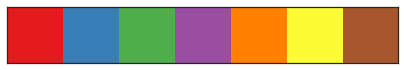

In [25]:
sns.palplot(stackColors)

The following function is overly complicated, but it's supposed to make the plot look good.

In [26]:
def makeConfPlot(confDf,ax):
    
    # order of face expressions is defined by hand here, instead of
    # using the columns, so the order is as we wish it to be
    faceExpressions = ['hap','ang','sup','ntr','dis','fea','sad']
    faceAnswers = ['hap','ang','sup','ntr','dis','fea','sad']
    
    # we loop through all expressions
    for i,emo in enumerate( faceExpressions ):
        
        # since we build a stacked plot, we have to initialize a value that
        # tells us where to start. We start at the very bottom, hence 0
        sumSoFar = 0
        
        # we get the values of all conditions, and their names, as defined
        # in the index
        thisMean = confDf[emo].mean()
        thisIndex = thisMean.index
        
        # firstly, we are interested in the correct response, which will be
        # always at the bottom of the stack plot and printed in a strong color
        
        # corrPos is the position of the current expression in the list of all expressions
        corrPos = faceExpressions.index(emo)
        corrCol = emoReverse[emo]
        # and we also get the name of the answer at this position (cave: the order of lists
        # must match!)
        corrEntry = faceAnswers[corrPos]

        # we get the positions of all the other answers
        incorrAnswers = faceAnswers[:corrPos]+faceAnswers[corrPos+1:]
        
        # we get the value of the correct answer
        entry = thisMean[corrEntry]
        # we get the name of the correct answer
        answer = faceAnswers[corrPos]
        
        # we take the color list and extract the color for the correct position
        thisColor = stackColors[corrCol]
        thisHex = rgb2hex( (thisColor[0]*255,thisColor[1]*255,thisColor[2]*255) )

        # this is the first bar we generate, it starts at the bottom (sumSoFar=0) and
        # has a strong color (alpha=1)
        ax.bar(i,
                entry,
                bottom=sumSoFar,
                color=thisHex,
                label=answer,
                alpha=1.)      
        
        # to stack the rest of the bars on top, we update the sum to be
        # the value (% correct) of the current condition
        sumSoFar = entry
        
        # we loop through the remaining (incorrect answers)
        for j,answer in enumerate(incorrAnswers):
            entry = thisMean[answer]

            thisColor = stackColors[emoReverse[answer]]
            thisHex = rgb2hex( (thisColor[0]*255,thisColor[1]*255,thisColor[2]*255) )
            
            # same thing as above, but without the legend and with transparency
            ax.bar(i,
                    entry,
                    bottom=sumSoFar,
                    color=thisHex,
                    alpha=.6
                        )           
            # for each run of the loop, we update the sumSoFar so we
            # always stack each expression at the top
            sumSoFar+=entry
    
    
    # x labels for each plot
    ax.set_xlabel('Basic Expression',fontsize=14)
    # y labels only for the first plot
    ax.set_ylabel('% of responses')
    
    # axes annotation for all plots
    ax.set_xticks(np.arange(0,7.1,1)+0.4,  )
    ax.set_xticklabels(faceExpressions)
    ax.set_yticks(np.arange(0,101,10))
    ax.set_yticklabels([str(a)+'%' for a in  np.arange(0,101,10)] )
    ax.set_ylim(0,100)

    plt.legend(loc='best',bbox_to_anchor=[1.1,0.9])
    
    return ax

In [27]:
sns.set_style("white")

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


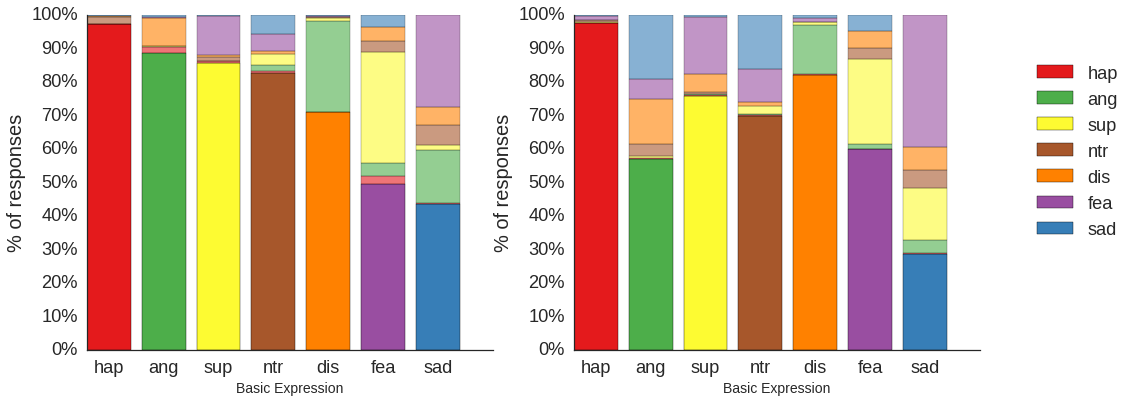

In [28]:
f, ( ax1,ax2 ) = plt.subplots( 1,2,figsize=(16,6) );
makeConfPlot(bigDf['f'].unstack(1),ax1);
makeConfPlot(bigDf['m'].unstack(1),ax2);
sns.despine()
plt.savefig('../figures/confusionPlot.png',dpi=300)

## Get only the correct responses

In [29]:
def makeDiagonal(df):
    diagDf = pd.DataFrame()

    for ident in df.columns.levels[0]:
        for real in df.columns.levels[1]:
            for resp in df.columns.levels[2]:
                if real == resp:
                    thisCond = pd.DataFrame(df[ident][real][resp])
                    thisCond.columns=pd.MultiIndex.from_tuples( [(ident,resp)] )
                    diagDf = pd.concat([diagDf,thisCond],axis=1)
    return  diagDf

### For the % of correct responses:

In [30]:
hitCount = makeDiagonal(stackHits)

In [31]:
hitCount.tail()

f                                                  m          \
         ang    dis    fea     hap    ntr    sad     sup    ang     dis   
p092   87.50  56.25  37.50   93.75  68.75  12.50   81.25  43.75   75.00   
p093   93.75  62.50  56.25   93.75  87.50  81.25   75.00  56.25  100.00   
p094   87.50  75.00  31.25  100.00  93.75  18.75   93.75  31.25   81.25   
p095  100.00  87.50  31.25  100.00  93.75  62.50  100.00  43.75   75.00   
p096   62.50  68.75  31.25   93.75  93.75  25.00   87.50  56.25   50.00   

                                           
        fea     hap    ntr    sad     sup  
p092  50.00   93.75  68.75   0.00   43.75  
p093  87.50  100.00  62.50  12.50   68.75  
p094  31.25  100.00  87.50  18.75  100.00  
p095  81.25  100.00  81.25  18.75   93.75  
p096  62.50  100.00  31.25  31.25   87.50

### For the number of revealed tiles:

In [32]:
hitMasks = makeDiagonal(stackMask)

In [33]:
hitMasks.tail()

f                                                         \
            ang        dis        fea        hap        ntr        sad   
p092  16.666667  20.370370  25.000000  18.472222  23.674242  33.333333   
p093  20.000000  18.958333  32.407407  12.916667  18.750000  21.955128   
p094  20.982143  20.138889  44.166667  17.317708  30.833333  43.750000   
p095  21.614583  19.940476  40.000000  12.760417  37.361111  31.875000   
p096  14.791667  16.856061  31.250000  18.333333  31.666667  23.437500   

                         m                                              \
            sup        ang        dis        fea        hap        ntr   
p092  31.410256  26.488095  18.229167  25.260417  17.777778  23.106061   
p093  19.097222  25.000000  21.354167  28.720238  10.807292  21.041667   
p094  24.444444  33.750000  20.512821  30.833333  20.963542  29.166667   
p095  18.750000  32.142857  19.618056  43.269231  12.890625  34.935897   
p096  21.279762  25.925926  15.104167  25.416667  21.354167  37.916667   

                            
            sad        sup  
p092        NaN  35.714286  
p093  20.833333  28.787879  
p094  36.805556  19.401042  
p095  20.833333  26.666667  
p096  30.416667  24.107143

## Plotting the relationship of hits and speed

Restructuring again

In [34]:
bigCount = hitMasks.stack(0).unstack(1)
bigHits = hitCount.stack(0).unstack(1)

How to plot:

In [35]:
def makeMyScatter(bigCount,bigHits,stackColors=stackColors):
    
    # order of face expressions is defined by hand here, instead of
    # using the columns, so the order is as we wish it to be
    for e,emo in enumerate(['hap','ang','sup','ntr','dis','fea','sad']):
        thisColor = stackColors[emoReverse[emo]]
        thisHex = rgb2hex( (thisColor[0]*255,thisColor[1]*255,thisColor[2]*255) )
        
        for i,ident in enumerate(bigCount.mean().index.levels[1]):

            assert bigCount.shape[0] == bigHits.shape[0], 'number of participants in both metric dicts not equal!'
            n = bigCount.shape[0]

            countMean = bigCount.mean()[emo][ident]
            countCI = bigCount.std(ddof=1)[emo][ident]/np.sqrt(n)*1.96

            hitMean = bigHits.mean()[emo][ident]
            hitCI = bigHits.std(ddof=1)[emo][ident]/np.sqrt(n)*1.96

            if i == 0:
                myFmt = 'o'
            elif i == 1:
                myFmt = 'v'

            plt.errorbar(countMean,
                         hitMean,
                         xerr=countCI,
                         yerr=hitCI,
                         fmt=myFmt,
                         c=thisColor,
                         ecolor='gray',
                         label= str(ident)+'-'+str(emo),
                         markersize=15,
                         markeredgecolor='gray',
                         markeredgewidth=.5
                        )
    sns.despine()
    plt.xlabel('% Tiles Revealed')
    plt.ylabel('% Correct Responses')

    plt.legend(loc='right', bbox_to_anchor=(1.2,.5));
    
    plt.savefig('../figures/globalScatter.png',dpi=300)
    plt.show()

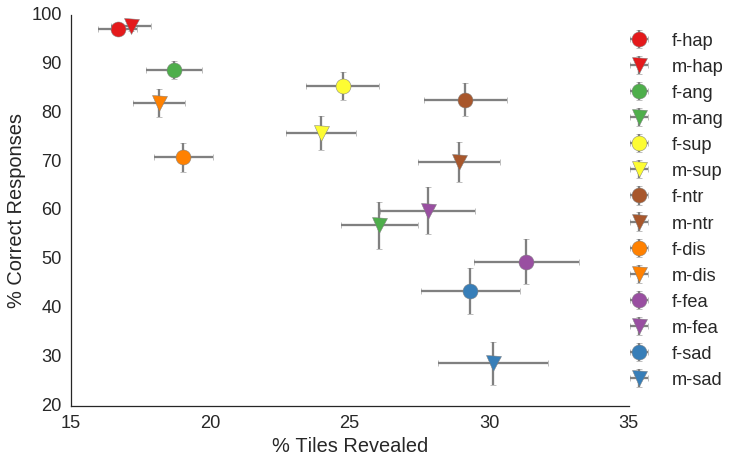

In [36]:
fig = plt.figure(figsize=(10,7))
makeMyScatter(bigCount,bigHits)

## Violin Plots for correct responses

In [37]:
def scriptToGetViolinPlot(df,myYscale):
    # restructure so that the the cases move to the index and there is only one column left
    violinDf = pd.DataFrame( df.stack(0).stack(0) )

    violinDf['g'] = violinDf.index.labels[2]
    violinDf['e'] = violinDf.index.labels[1]

    # change the emoname-number mapping
    emoList = list(violinDf['e'])
    for i,entry in enumerate(emoList):
        thisName = violinDf.index.levels[1][entry]
        thisNumber = myLabels.values().index(thisName)
        emoList[i] = thisNumber
    violinDf['e'] = emoList
    # change the order to be like the new mapping
    violinDf = violinDf.sort_values(by='g')
    violinDf = violinDf.sort_values(by='e')
    fig = plt.figure(figsize=(14,6))

    sns.violinplot(x="e",
                      y=0,
                      hue="g",
                      data=violinDf,
                      split=True,
                      inner=None)

    sns.stripplot(x="e",
                      y=0,
                      hue="g",
                      data=violinDf,
                      split=True,
                      jitter=True,
                      alpha=1.,
                      linewidth=.5,
                      edgecolor='white')

    plt.xticks(range(7),myLabels.values())
    plt.ylim(0,myYscale)
    sns.despine()
    plt.show()

### % Hits

The blue parts of the plot are the female face and the green part are the male face.

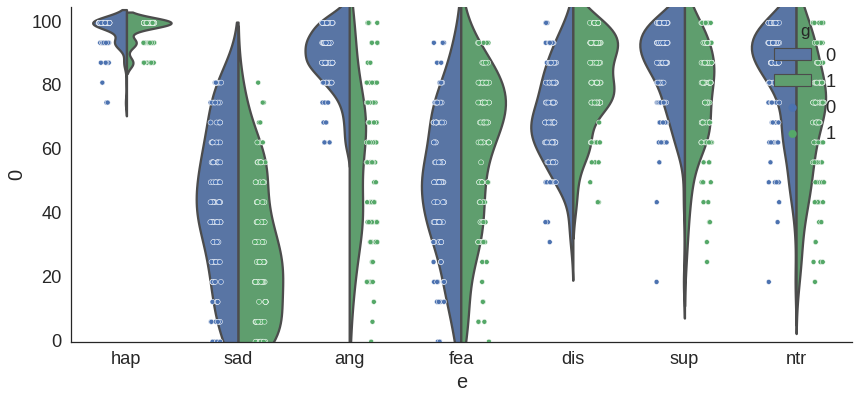

In [38]:
scriptToGetViolinPlot(bigHits,105)

### % Tiles Revealed

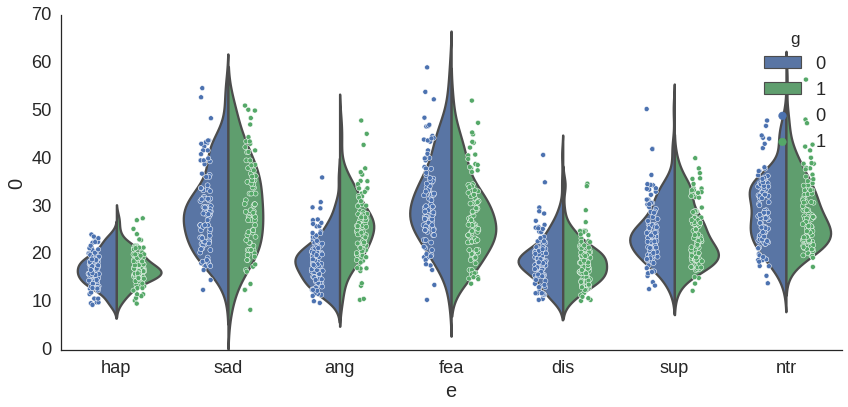

In [39]:
scriptToGetViolinPlot(bigCount,myYscale=70)

## Inferential Statistics

Make mean values (averaged over face gender)

In [40]:
def makeAverage(df,myLabels=myLabels):
    
    meanDf = pd.DataFrame()
    
    for index,entry in enumerate( df.columns.levels[0] ):
        thisDf = pd.DataFrame( df[ entry ].T.mean() )
        thisDf.columns = [myLabels[index]]
        meanDf = pd.concat([meanDf, thisDf],axis=1)
        
    return meanDf

In [41]:
meanHits = makeAverage(bigHits)

In [42]:
meanCount = makeAverage(bigCount)

In [43]:
from scipy import stats

In [44]:
def ttestTable(df):

    d = {}

    for entry1 in df.columns:
        firstSample = df[entry1]
        for entry2 in df.columns:
            if entry1 != entry2:
                secondSample = df[entry2]
                thisT,thisP =  stats.ttest_rel(firstSample,secondSample)

                newName = [entry1,entry2]
                newName.sort()

                d[newName[0]+'-'+newName[1]] = {'t':round(thisT,2),'p':round(thisP,5)}
    outDf = pd.DataFrame(d).T
    
    return outDf

In [45]:
meanHits['sad'][:5]

p001    93.750
p002    46.875
p003    53.125
p004    87.500
p005    90.625
Name: sad, dtype: float64

In [46]:
ttestTable(meanHits)

,p,t
ang-dis,0.00000,8.05
ang-fea,0.00000,19.83
ang-hap,0.00000,-7.83
ang-ntr,0.00000,9.59
ang-sad,0.00000,-11.38
ang-sup,0.00000,-7.76
dis-fea,0.00000,-13.33
dis-hap,0.06618,1.86
dis-ntr,0.00980,2.64
dis-sad,0.95641,-0.05


In [47]:
ttestTable(meanCount)

,p,t
ang-dis,0.38042,-0.88
ang-fea,0.00000,-16.53
ang-hap,0.00000,11.27
ang-ntr,0.00000,-7.89
ang-sad,0.00000,15.76
ang-sup,NaN,NaN
dis-fea,0.00000,21.30
dis-hap,0.00000,11.19
dis-ntr,0.00000,-9.28
dis-sad,0.00000,17.73


In [48]:
ttestTable(meanCount.fillna(0))

,p,t
ang-dis,0.38042,-0.88
ang-fea,0.00000,-16.53
ang-hap,0.00000,11.27
ang-ntr,0.00000,-7.89
ang-sad,0.00000,15.76
ang-sup,0.26350,-1.12
dis-fea,0.00000,21.30
dis-hap,0.00000,11.19
dis-ntr,0.00000,-9.28
dis-sad,0.00000,17.73
